In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_dir = 'C:\\Users\\vaibhav\\Downloads\\archive\\train'
test_dir = 'C:\\Users\\vaibhav\\Downloads\\archive\\test'

In [3]:
imagee_size = (48,48)
batchh_size =32 

In [4]:
train_datagen = ImageDataGenerator(
                rescale=1.0/255,
                validation_split = 0.2
    
)

In [5]:
test_datagen = ImageDataGenerator(rescale = 1.0/255)

In [6]:
train_data = train_datagen.flow_from_directory(train_dir,
                                              target_size = imagee_size,
                                              color_mode = 'grayscale',
                                              class_mode = 'categorical',
                                              batch_size = batchh_size,
                                              subset='training')

Found 22968 images belonging to 7 classes.


In [7]:
test_data = test_datagen.flow_from_directory(
                                        test_dir,
                                        target_size = imagee_size,
                                        color_mode = 'grayscale',
                                        class_mode = 'categorical',
                                        batch_size = batchh_size)

Found 7178 images belonging to 7 classes.


In [8]:
val_data = train_datagen.flow_from_directory(
                                            train_dir,
target_size = imagee_size,
color_mode = 'grayscale',
class_mode = 'categorical',
batch_size = batchh_size,
subset='validation')

Found 5741 images belonging to 7 classes.


In [9]:
print("Class indices:",train_data.class_indices)

Class indices: {'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}


In [10]:
print(f"Training samples: {train_data.samples}")
print(f"Validation samples: {val_data.samples}")
print(f"Testing samples: {test_data.samples}")

Training samples: 22968
Validation samples: 5741
Testing samples: 7178


In [11]:
from tensorflow.keras.models import Sequential

In [13]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D, Flatten , Dense ,Dropout

In [14]:
model = Sequential([
    
    
    Conv2D(32,(3,3),activation = 'relu',input_shape=(48,48,1)),
    MaxPooling2D((2,2)),
    Dropout(0.25),
    
    Conv2D(64,(3,3),activation = 'relu'),
    MaxPooling2D((2,2)),
    Dropout(0.25),
    
    
    Conv2D(128,(3,3),activation = 'relu'),
    MaxPooling2D((2,2)),
    Dropout(0.4),
    
    
    Flatten(),
    Dense(128,activation='relu'),
    Dropout(0.5),
    Dense(7,activation='softmax')
])

In [15]:
model.compile(optimizer='adam',loss = 'categorical_crossentropy',
             metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 23, 23, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 23, 23, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 10, 10, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 10, 10, 64)        0

In [20]:
hot = model.fit(train_data ,validation_data = val_data,epochs = 25,steps_per_epoch = len(train_data),validation_steps = len(val_data))

Epoch 1/25
718/718 [==============================] - 1015s 1s/step - loss: 1.7951 - accuracy: 0.2598 - val_loss: 1.6926 - val_accuracy: 0.3341
Epoch 2/25
718/718 [==============================] - 94s 131ms/step - loss: 1.6325 - accuracy: 0.3548 - val_loss: 1.5083 - val_accuracy: 0.4132
Epoch 3/25
718/718 [==============================] - 95s 132ms/step - loss: 1.5110 - accuracy: 0.4141 - val_loss: 1.4363 - val_accuracy: 0.4581
Epoch 4/25
718/718 [==============================] - 94s 130ms/step - loss: 1.4616 - accuracy: 0.4384 - val_loss: 1.3768 - val_accuracy: 0.4713
Epoch 5/25
718/718 [==============================] - 96s 134ms/step - loss: 1.4065 - accuracy: 0.4582 - val_loss: 1.3224 - val_accuracy: 0.4922
Epoch 6/25
718/718 [==============================] - 97s 134ms/step - loss: 1.3748 - accuracy: 0.4765 - val_loss: 1.3046 - val_accuracy: 0.5065
Epoch 7/25
718/718 [==============================] - 97s 135ms/step - loss: 1.3521 - accuracy: 0.4851 - val_loss: 1.2768 - val_acc

In [21]:
test_loss, test_accuracy = model.evaluate(test_data)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


225/225 [==============================] - 277s 1s/step - loss: 1.1257 - accuracy: 0.5646
Test Loss: 1.125705599784851
Test Accuracy: 0.5646419525146484


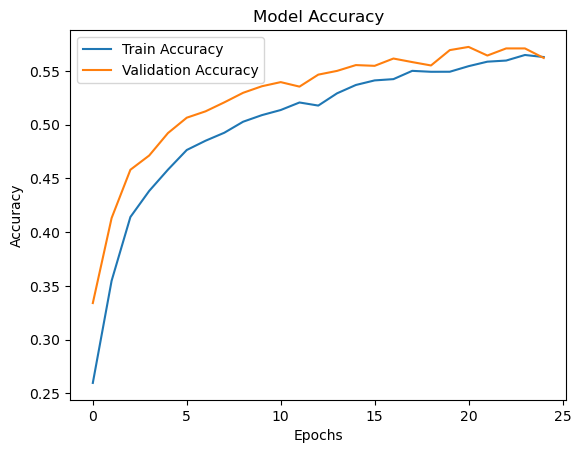

In [22]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(hot.history['accuracy'], label='Train Accuracy')
plt.plot(hot.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


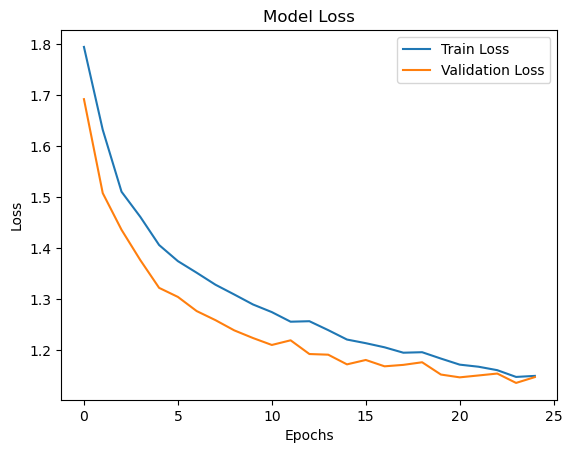

In [23]:

# Plot training & validation loss
plt.plot(hot.history['loss'], label='Train Loss')
plt.plot(hot.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [27]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load a sample image
img_path = "PrivateTest_2233220.jpg"  # Replace with the path to your image
img = image.load_img(img_path, target_size=(48, 48), color_mode='grayscale')
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict the emotion
predictions = model.predict(img_array)
emotion_classes = list(train_data.class_indices.keys())  # ['angry', 'disgust', ...]
predicted_emotion = emotion_classes[np.argmax(predictions)]
print(f"Predicted Emotion: {predicted_emotion}")


1/1 [==============================] - 0s 110ms/step
Predicted Emotion: sad


In [2]:
import os
import subprocess

In [7]:
repo_url = 'https://github.com/Coderrvaibhav/Convolution-Neural-Network.git'

In [8]:
repo_name = 'Emotional_Detection_Using_CNN'

In [9]:
if not os.path.exists(repo_name):
    subprocess.run(["git", "clone", repo_url])
    print(f"Repository '{repo_name}' cloned successfully.")
else:
    print(f"The repository '{repo_name}' already exists.")

The repository 'Emotional_Detection_Using_CNN' already exists.


In [10]:

# Step 2: Add or modify files
repo_path = os.path.join(os.getcwd(), repo_name)
cnn_folder = os.path.join(repo_path, "CNN")

if not os.path.exists(cnn_folder):
    os.makedirs(cnn_folder)
    print("CNN folder created.")

readme_path = os.path.join(cnn_folder, "README.md")
with open(readme_path, "w") as f:
    f.write("# CNN Projects\n\nThis folder contains CNN-related projects.")
    print("README.md created or updated.")

# Step 3: Stage changes
subprocess.run(["git", "-C", repo_path, "add", "."])
print("All changes staged.")

# Step 4: Commit changes
commit_message = "Added CNN folder with README"
subprocess.run(["git", "-C", repo_path, "commit", "-m", commit_message])
print(f"Changes committed with message: '{commit_message}'")

# Step 5: Push changes to GitHub
subprocess.run(["git", "-C", repo_path, "push"])
print("Changes pushed to GitHub.")

README.md created or updated.
All changes staged.
Changes committed with message: 'Added CNN folder with README'
Changes pushed to GitHub.
